<div style="border: 2px solid #e3647f; border-radius: 15px; padding: 20px; background-color: #f9f9f9; font-family: Arial, sans-serif;">

<h1 style="color: #419aba;">Heart Attack Analysis and Prediction 💗</h1>

<p style="font-size: 16px; color: #333;">
    This project aims to analyze heart attack risk factors and build a predictive model using machine learning techniques. We will use Python and Plotly for analysis, explore different models for prediction, and deploy the final model with Streamlit or Dash.
</p>

</div>


<img src="https://www.heartattackethiopia.org/wp-content/uploads/2023/12/HEART-ATTACK-SYMTOMPS-01.png" alt="Heart Health" style="max-width: 100%; border-radius: 10px;">

# **Loading prerequirements**

In [63]:
# Import Library
import warnings
import string

# Third-Party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import plotly.express as px


# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# ML-Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

warnings.filterwarnings('ignore')

In [44]:
# Loading dataset
df = pd.read_csv('/kaggle/input/heart-attack/heart.csv')

# **Data Overview**

In [45]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
df.shape

(303, 14)

<div style="border: 2px solid #e3647f; border-radius: 15px; padding: 20px; background-color: #f9f9f9; font-family: Arial, sans-serif;">

<p style="font-size: 20px;color:#419aba;">Dataset Overview </p>

<p style="font-size: 16px; color: #333;">
    The dataset contains key indicators of heart attack risk such as age, cholesterol levels, resting blood pressure, and more. We will explore each feature and clean the data for accurate analysis and prediction.
</p>

</div>


# **Data Preprocessing**

**checking nulls**

In [48]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Checking duplicates**

In [49]:
df.duplicated().sum()

1

In [50]:
# droping duplicated values

df.drop_duplicates(inplace=True)
df.shape

(302, 14)

**checking garbage**

In [51]:
for c in df:
    print(c,":",df[c].unique())

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs : [

**Renaming columns**

In [52]:
# Rename columns to more descriptive names
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain_Type',
    'trtbps': 'Resting_Blood_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_ECG',
    'thalachh': 'Max_Heart_Rate_Achieved',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'ST_Depression',
    'slp': 'Slope_of_ST_Segment',
    'caa': 'Number_of_Major_Vessels',
    'thall': 'Thalassemia'
}, inplace=True)

# Display the first few rows to confirm the changes
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **EDA**

**Identifying categorical and numerical columns**

In [53]:
for c in df:
    print(c,df[c].nunique())

Age 41
Sex 2
Chest_Pain_Type 4
Resting_Blood_Pressure 49
Cholesterol 152
Fasting_Blood_Sugar 2
Resting_ECG 3
Max_Heart_Rate_Achieved 91
Exercise_Induced_Angina 2
ST_Depression 40
Slope_of_ST_Segment 3
Number_of_Major_Vessels 5
Thalassemia 4
output 2


In [54]:
numerical_columns=[]
categorical_columns=[]
for c in df:
    if df[c].nunique()<=10:
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)
print('Categorical Columns:',categorical_columns)
print('Numerical Columns:',numerical_columns)

Categorical Columns: ['Sex', 'Chest_Pain_Type', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Exercise_Induced_Angina', 'Slope_of_ST_Segment', 'Number_of_Major_Vessels', 'Thalassemia', 'output']
Numerical Columns: ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate_Achieved', 'ST_Depression']


***Uniplot***

**Numerical columns**

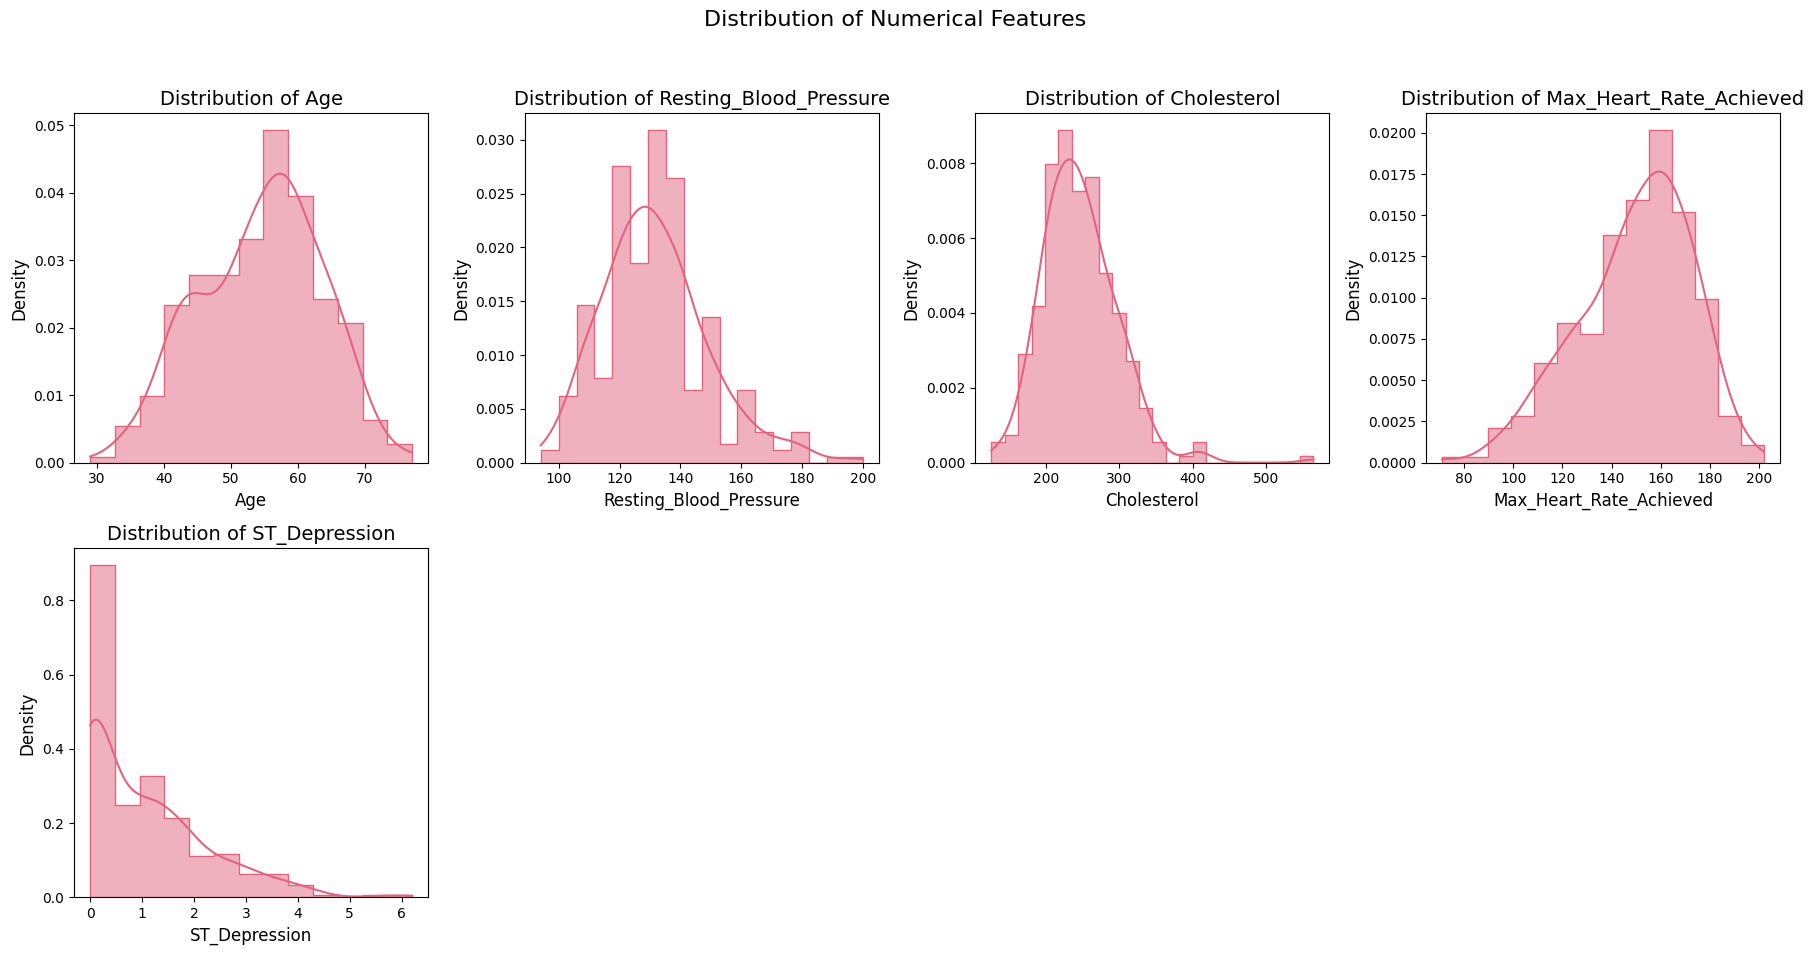

In [55]:
# Setup the figure for multiple subplots
num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle("Distribution of Numerical Features", fontsize=16)
    
# Flatten axes array for easy iteration
axes = axes.flatten()
    
# Iterate over each numerical column and create a histogram with KDE
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i],color="#e3647f", element='step', stat='density')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
        
# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
        
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

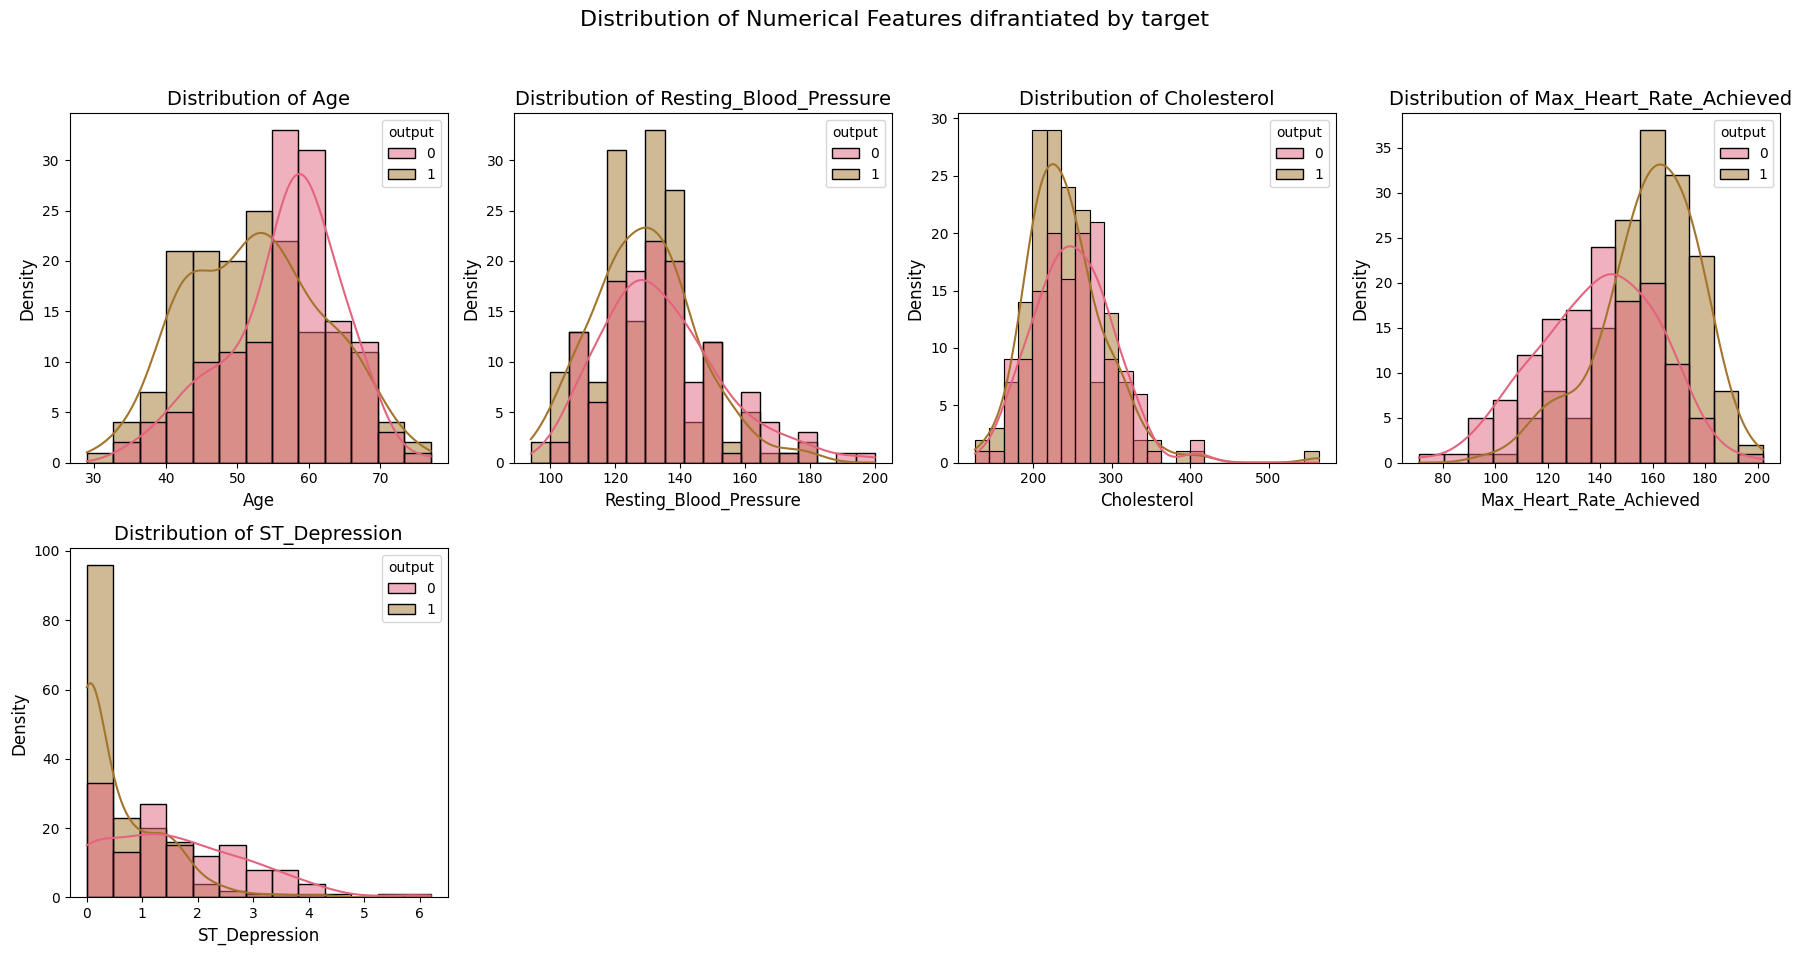

In [56]:
# Setup the figure for multiple subplots
num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle("Distribution of Numerical Features difrantiated by target", fontsize=16)
    
# Flatten axes array for easy iteration
axes = axes.flatten()
    
# Iterate over each numerical column and create a histogram with KDE
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df,x=col,kde=True ,ax=axes[i], palette=["#e3647f", "#a3742c"],hue='output',fill=True,)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
        
# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
        
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

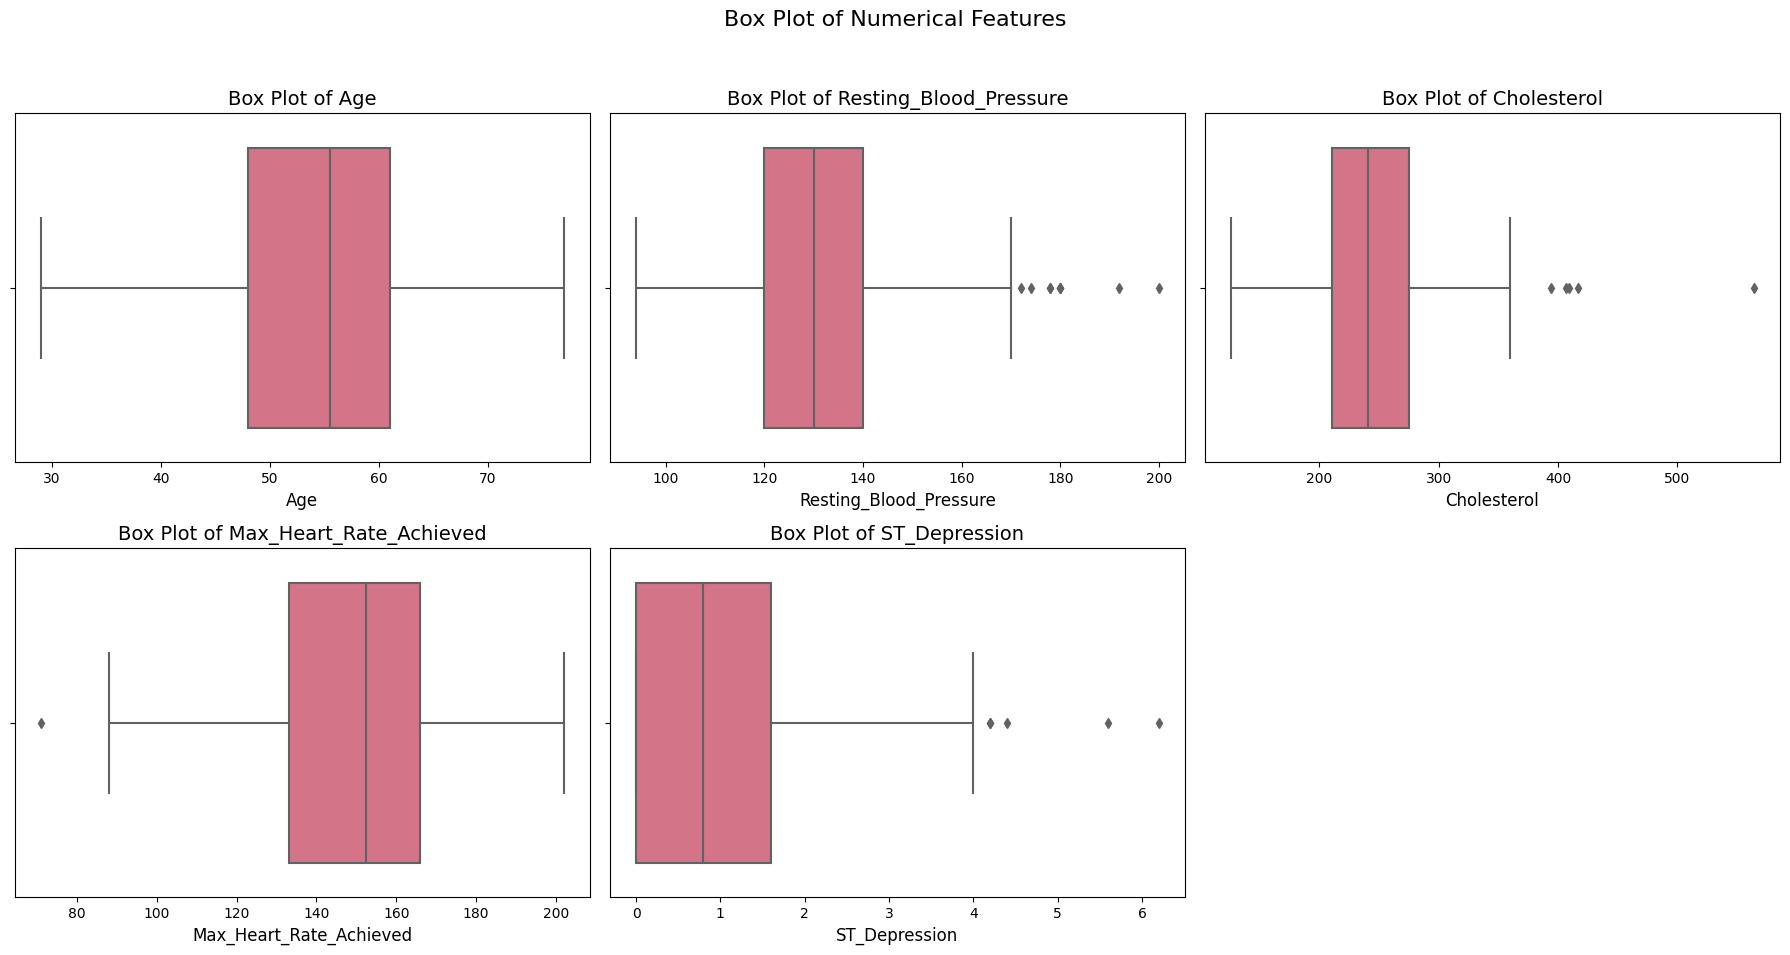

In [57]:
# Set up the figure for multiple subplots
num_cols = 3  # Number of columns for the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle('Box Plot of Numerical Features', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over each numerical column and create a box plot
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i], color="#e3647f")
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
plt.show()

****categorical columns****

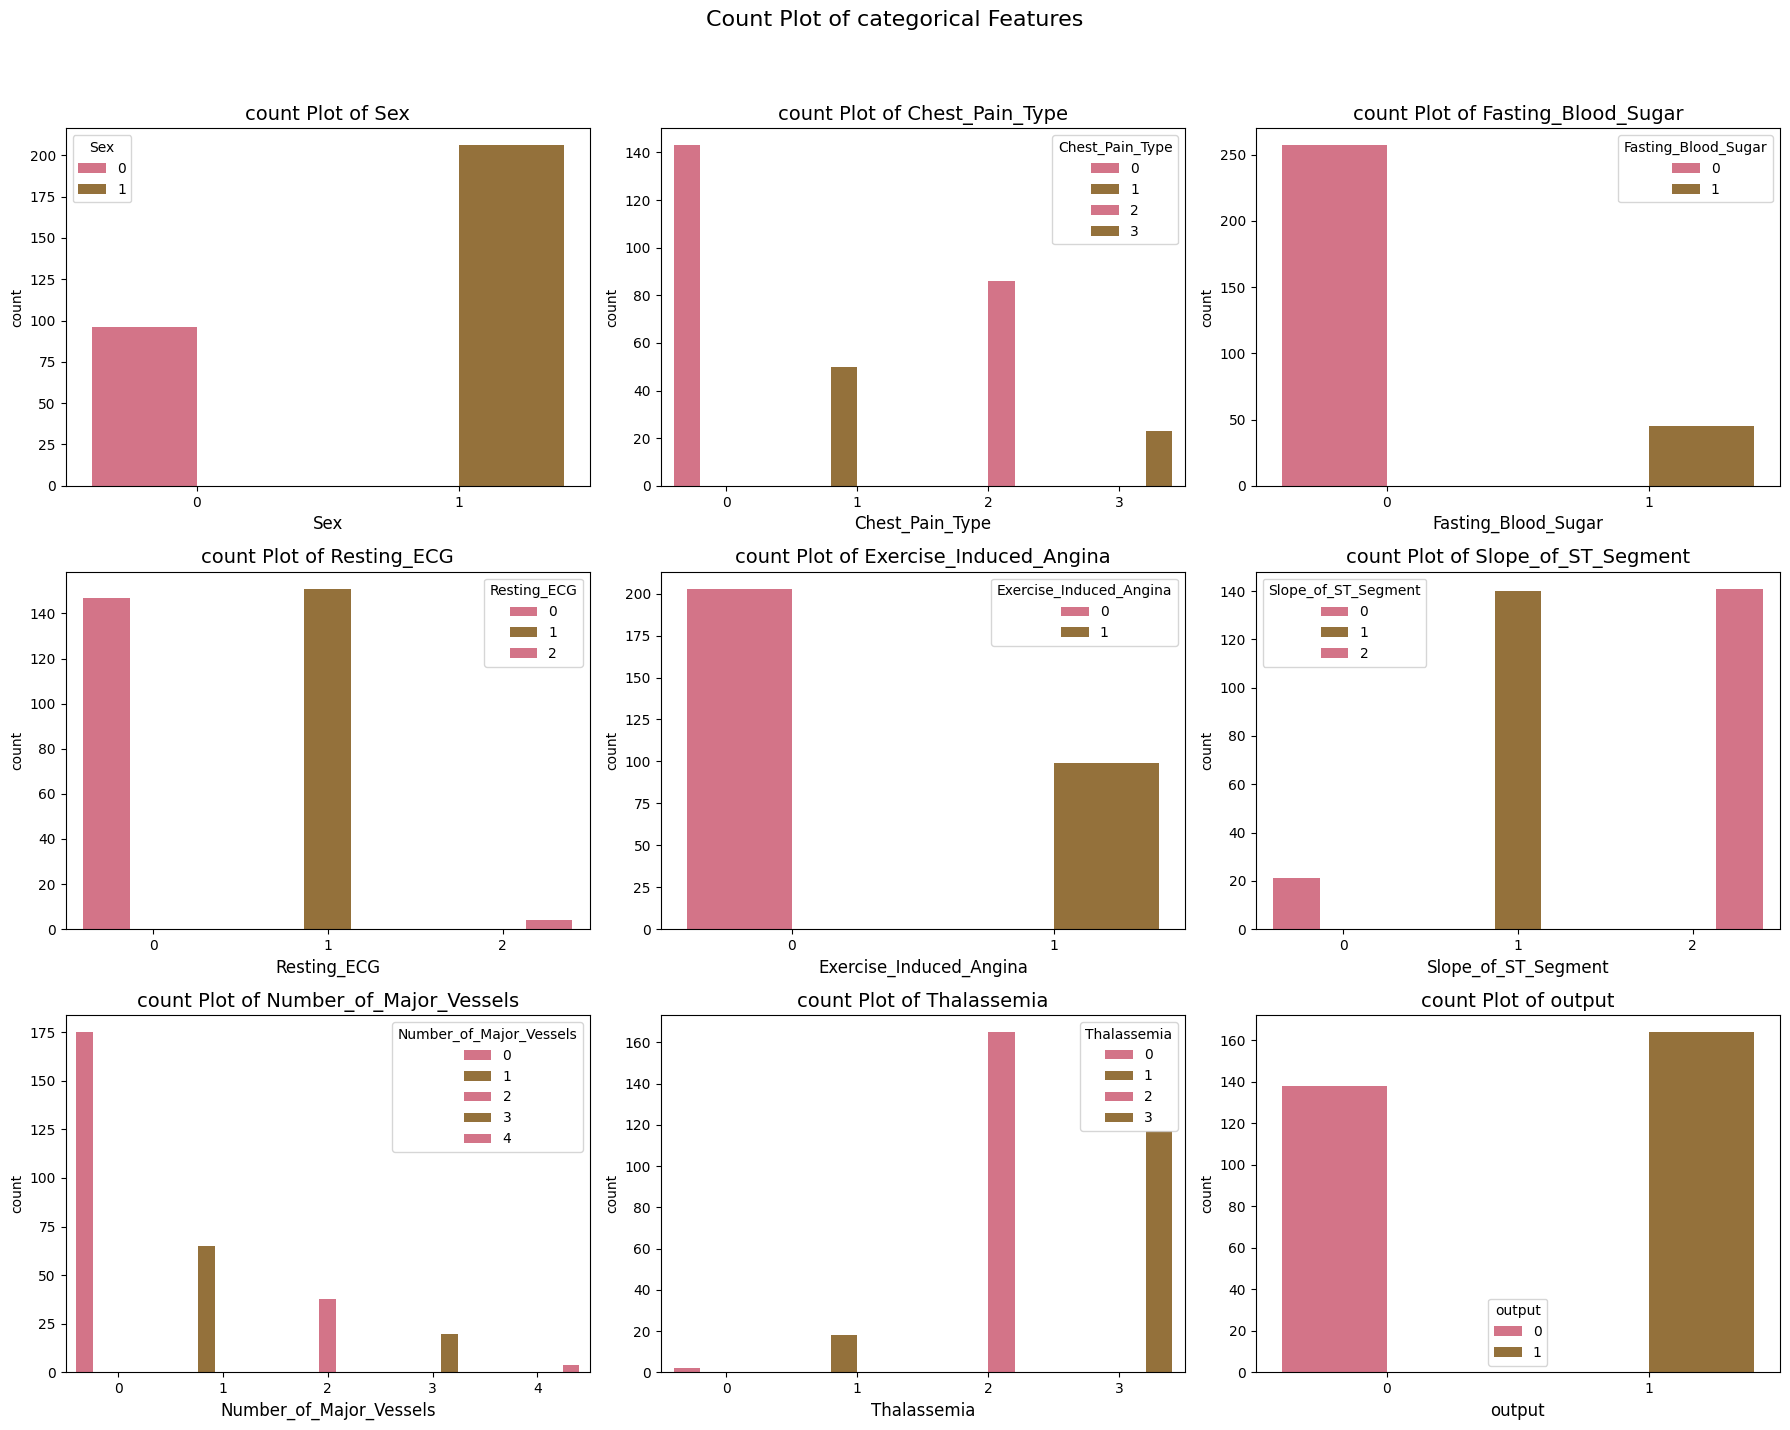

In [58]:
# Set up the figure for multiple subplots
num_cols = 3  # Number of columns for the subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle('Count Plot of categorical Features', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over each numerical column and create a box plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette=["#e3647f", "#a3742c"])
    axes[i].set_title(f'count Plot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
plt.show()

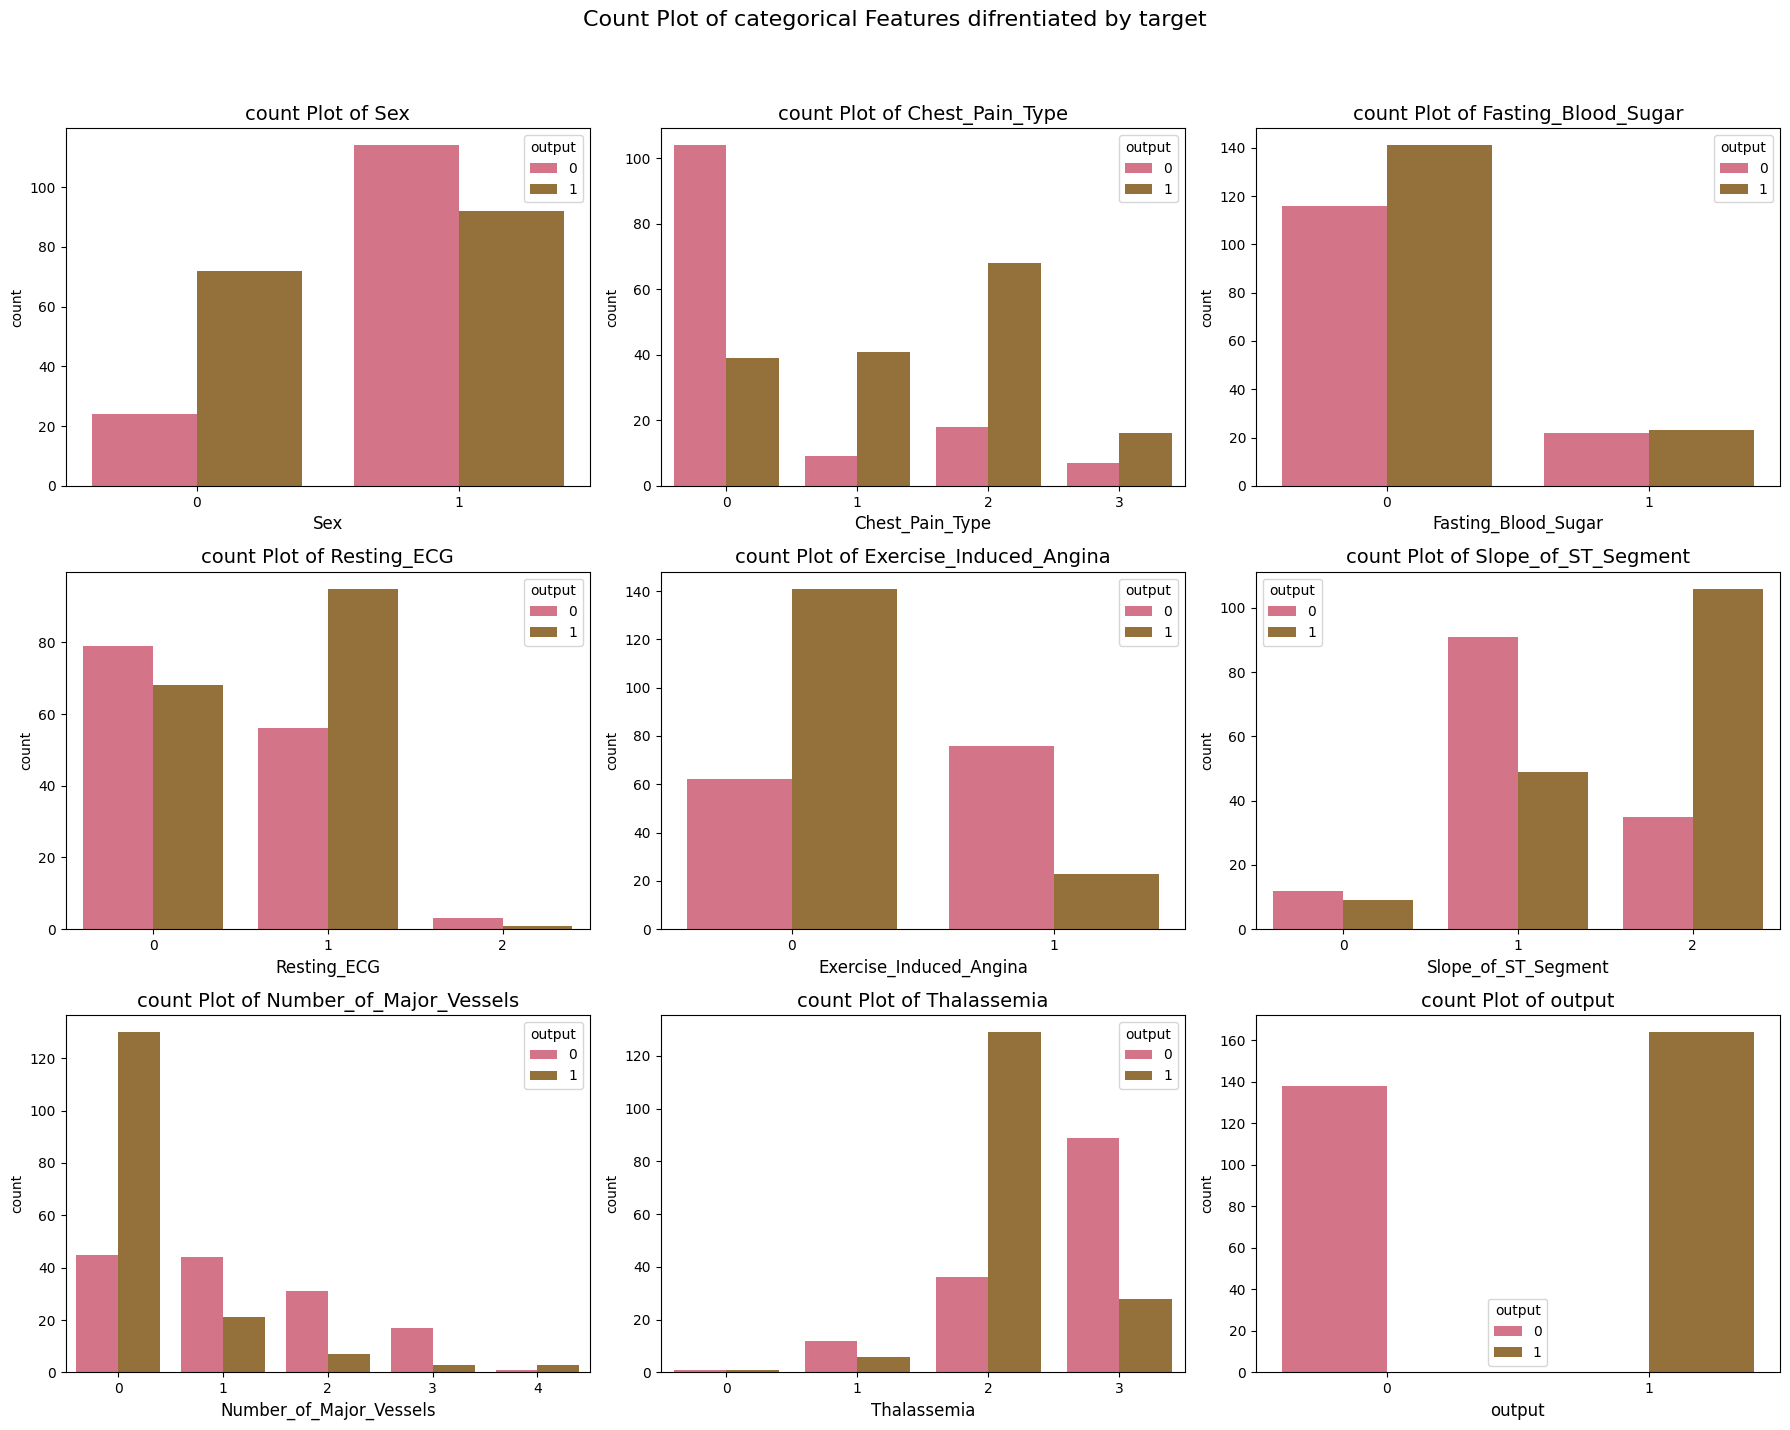

In [59]:
# Set up the figure for multiple subplots
num_cols = 3  # Number of columns for the subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
fig.suptitle('Count Plot of categorical Features difrentiated by target', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over each numerical column and create a box plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], hue=df['output'], palette=["#e3647f", "#a3742c"])
    axes[i].set_title(f'count Plot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
plt.show()

***Biplot***

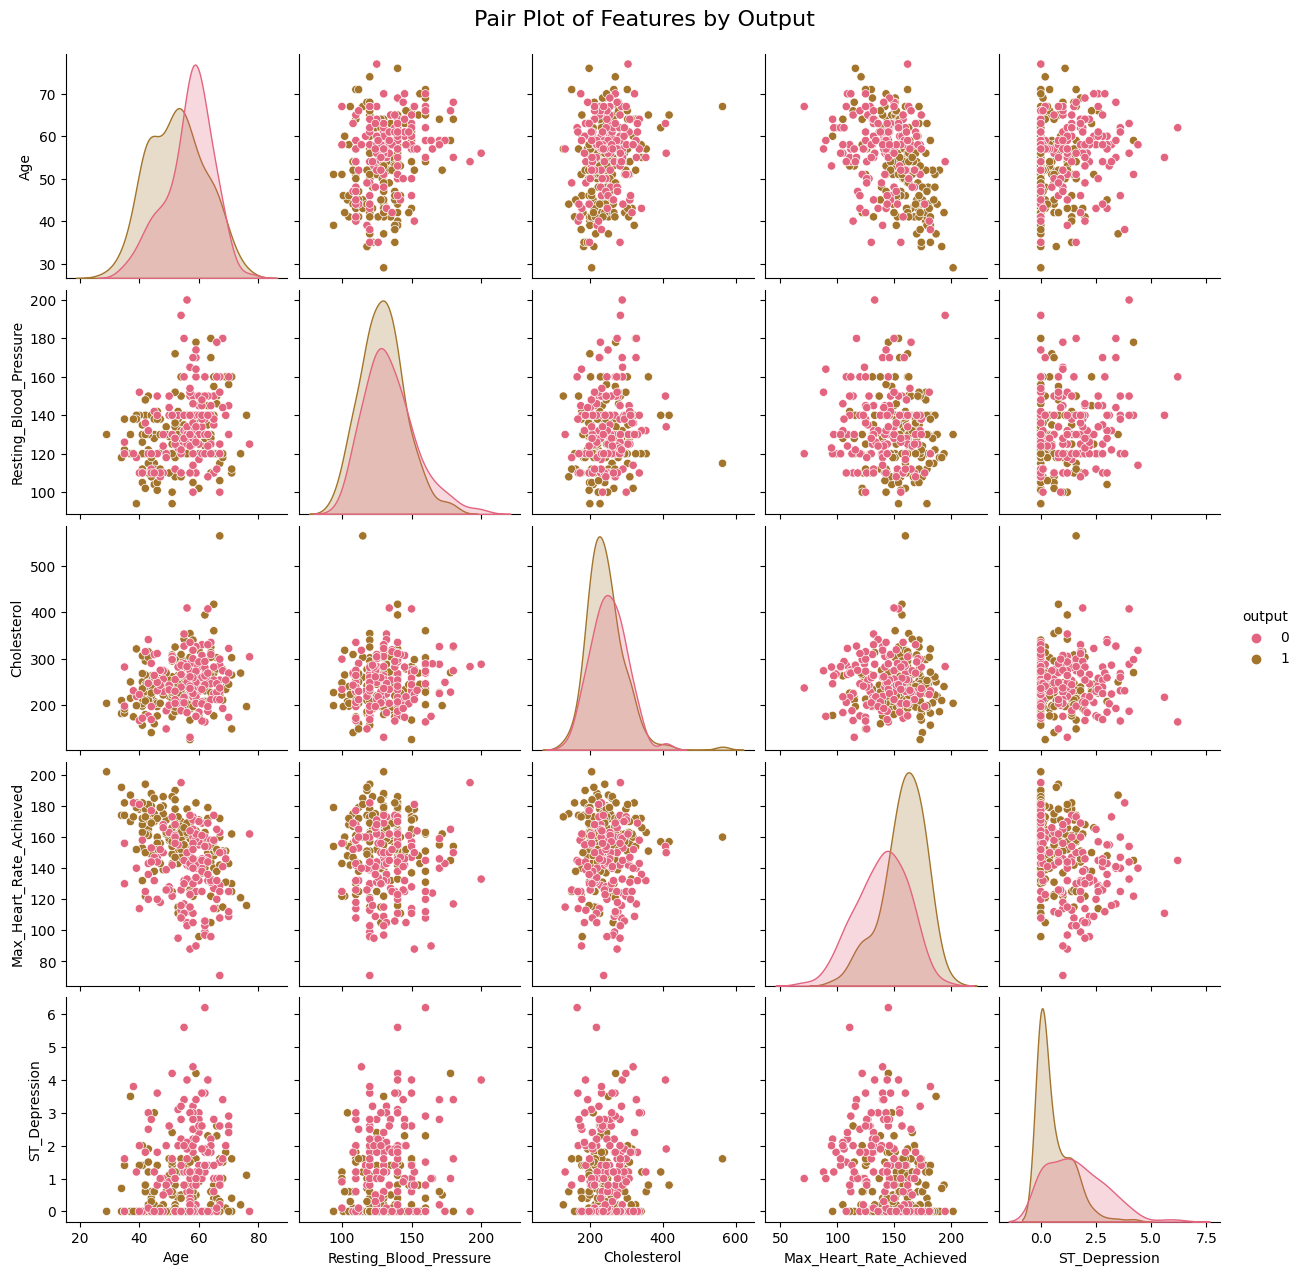

In [60]:
sns.pairplot(df[numerical_columns+['output']], hue='output', palette=["#e3647f", "#a3742c"], diag_kind='kde')
plt.suptitle('Pair Plot of Features by Output', y=1.02, fontsize=16)
plt.show()

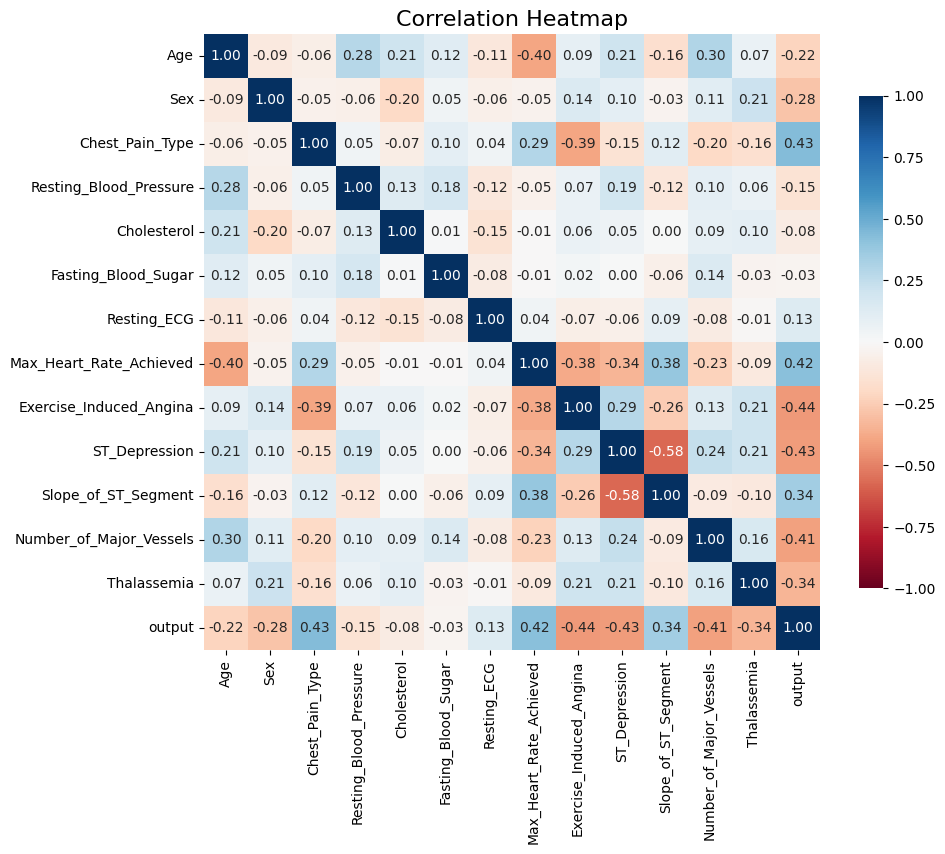

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap='RdBu',square=True,cbar_kws={"shrink": .8},vmin=-1,vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<div style="border: 2px solid #e3647f; border-radius: 15px; padding: 20px; background-color: #f9f9f9; font-family: Arial, sans-serif;">

<p style="font-size: 20px;color:#419aba;">Observations and Issues of the dataset</p>

<p style="font-size: 16px; color: #333;">
From the EDA some issues have been observed in the dataset such as:
- Numerical features show some sqewness in its distribution.
- There are some outliers in the numerical features.
- The data is unpalanced.
- There is no linear relationships have been observed.
- Most of the features shows a strong correlation but there are a little which shows a week correlation which seems not affecting the target pridiction.
But most of these issues can not been handeled or it is better to not handle them because that may have a negative effect on the prediction.
</p>

</div>


# **Data Preparation**

In [62]:
# droping features with low correlation (less than 0.05)

df.drop('Fasting_Blood_Sugar',axis=1,inplace=True)

# creating a copy of df
df1 = df.copy()

# encoding the categorical columns
cat_c=['Sex',
 'Chest_Pain_Type',
 'Resting_ECG',
 'Exercise_Induced_Angina',
 'Slope_of_ST_Segment',
 'Number_of_Major_Vessels',
 'Thalassemia']
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df1[cat_c])
df1.drop(cat_c,axis=1,inplace=True)
df1[encoder.get_feature_names_out(cat_c)] = encoded

# defining the features and target
X = df1.drop('output',axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = StandardScaler()

# scaling the continuous featuree
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# **Modeling**

In [64]:
def creat_nn_model(l,m,n):
    return MLPClassifier(hidden_layer_sizes= (l,m),max_iter = n)

In [65]:
# Initialize the models
models = [
    LogisticRegression(C=29.763514416313132, max_iter=100, penalty='l1', solver='liblinear'),
    SVC(),
    CalibratedClassifierCV(SVC()),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    creat_nn_model(16,32,150),
    creat_nn_model(16,32,100),
    creat_nn_model(16,8,200),
    creat_nn_model(8,4,250),
]

# **Training and Evaluation**

In [66]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
    print("="*60, "\n") 

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='RdBu', 
                cbar=False, xticklabels=["No Heart Attack", "Heart Attack"],
                yticklabels=["No Heart Attack", "Heart Attack"])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}', fontsize=16)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.show()

Model: LogisticRegression
Training Accuracy: 0.8838
Testing Accuracy: 0.8852
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[27  2]
 [ 5 27]]
Matthews Correlation Coefficient: 0.7747844827586207



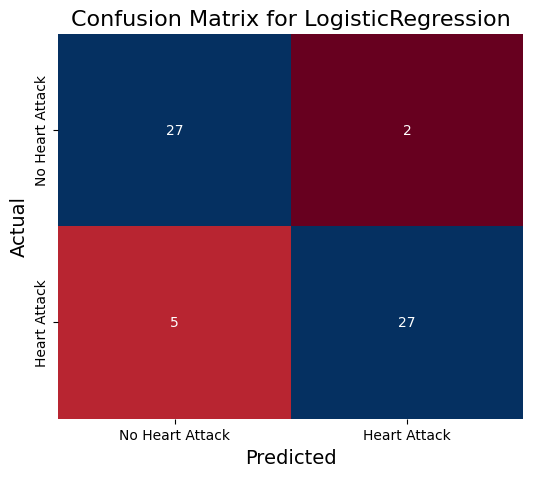

Model: SVC
Training Accuracy: 0.9170
Testing Accuracy: 0.9016
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion Matrix:
 [[28  1]
 [ 5 27]]
Matthews Correlation Coefficient: 0.8110170104305107



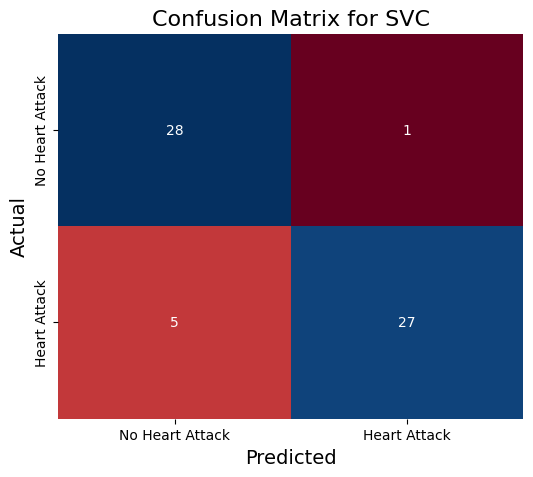

Model: CalibratedClassifierCV
Training Accuracy: 0.9004
Testing Accuracy: 0.9180
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
 [[28  1]
 [ 4 28]]
Matthews Correlation Coefficient: 0.8405172413793104



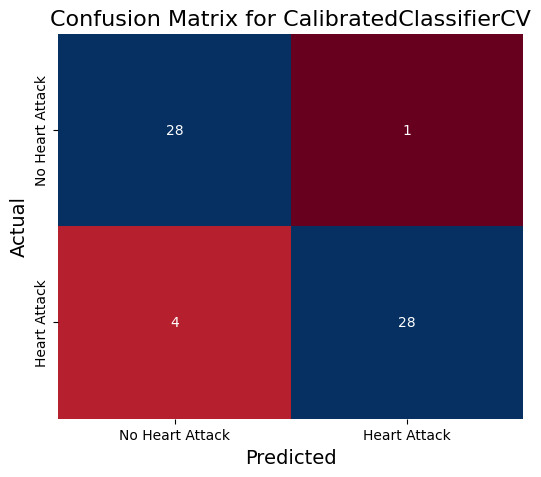

Model: LinearSVC
Training Accuracy: 0.8755
Testing Accuracy: 0.9016
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion Matrix:
 [[28  1]
 [ 5 27]]
Matthews Correlation Coefficient: 0.8110170104305107



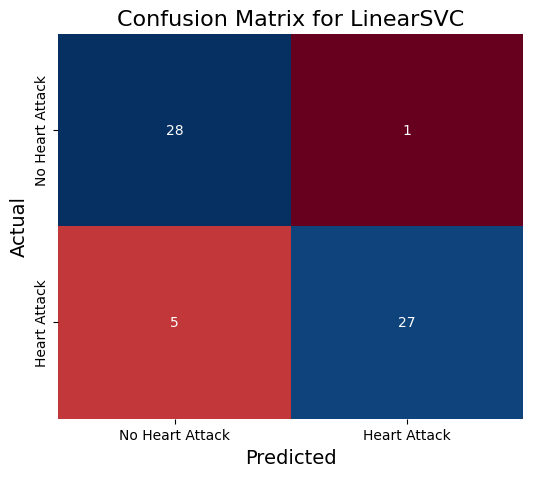

Model: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[24  5]
 [ 4 28]]
Matthews Correlation Coefficient: 0.7041053139822809



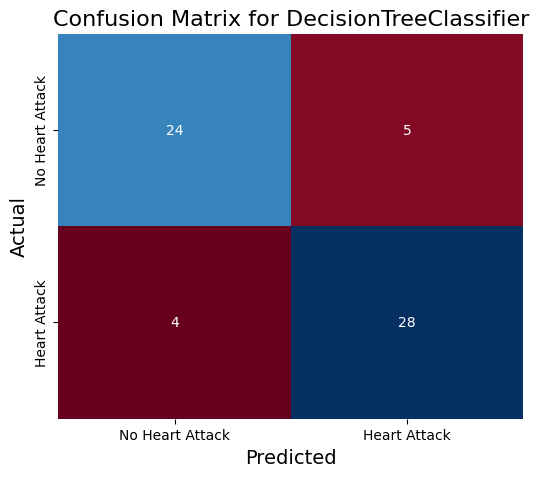

Model: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8361
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[25  4]
 [ 6 26]]
Matthews Correlation Coefficient: 0.6738432321543399



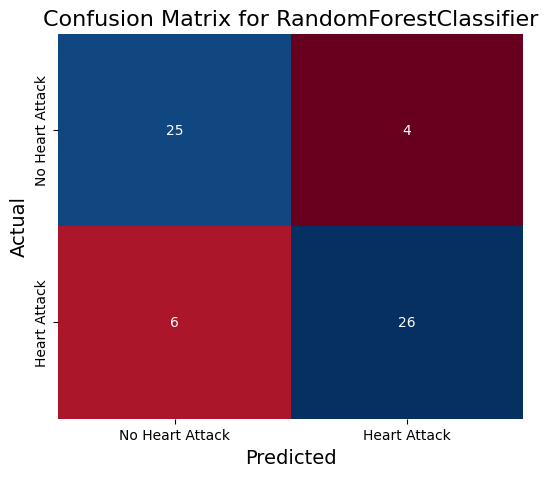

Model: XGBClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]
Matthews Correlation Coefficient: 0.7050596119186784



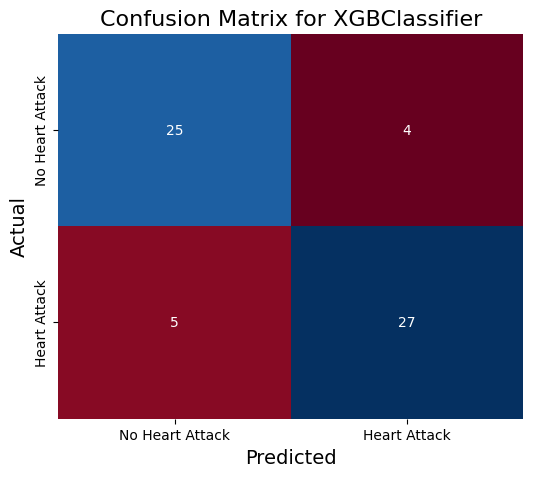

Model: MLPClassifier
Training Accuracy: 0.9129
Testing Accuracy: 0.8689
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[26  3]
 [ 5 27]]
Matthews Correlation Coefficient: 0.7395052723482932



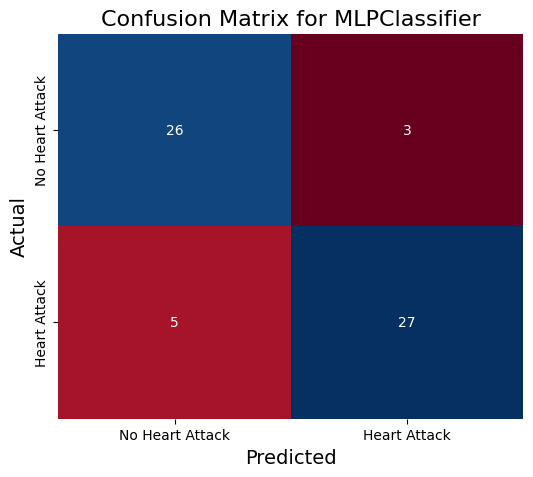

Model: MLPClassifier
Training Accuracy: 0.8921
Testing Accuracy: 0.8852
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[26  3]
 [ 4 28]]
Matthews Correlation Coefficient: 0.7707216521126317



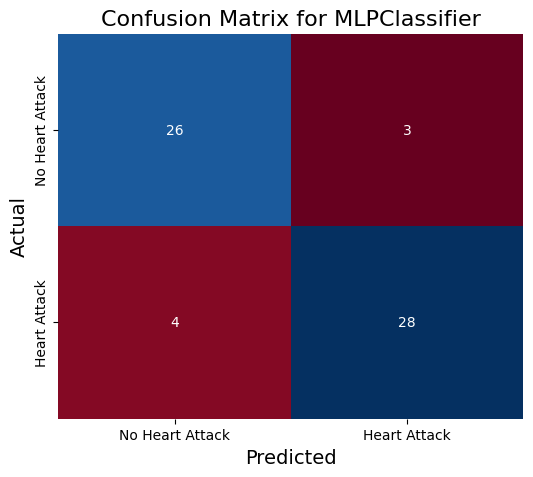

Model: MLPClassifier
Training Accuracy: 0.9336
Testing Accuracy: 0.9016
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]
Matthews Correlation Coefficient: 0.8051673125422465



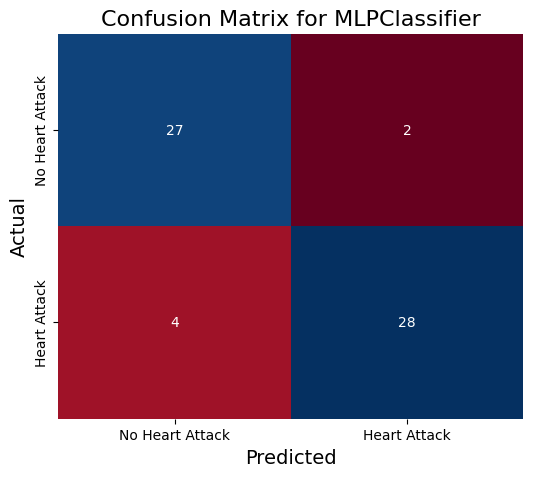

Model: MLPClassifier
Training Accuracy: 0.8631
Testing Accuracy: 0.9016
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]
Matthews Correlation Coefficient: 0.8051673125422465



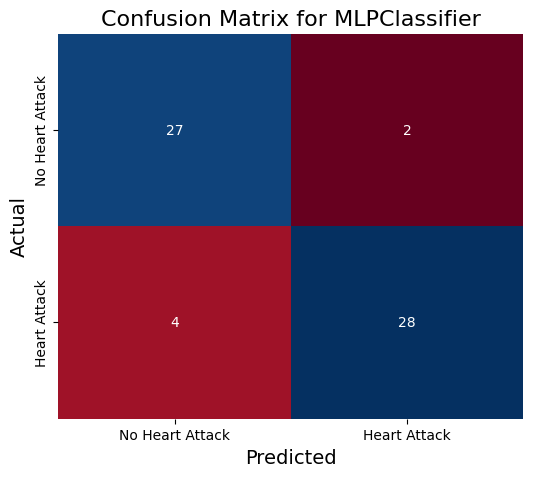

In [67]:
# Train and evaluate each model
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

<div style="border: 2px solid #e3647f; border-radius: 15px; padding: 20px; background-color: #f9f9f9; font-family: Arial, sans-serif;">

<h2 style="color: #419aba;">Conclusion 🎯</h2>

<p style="font-size: 16px; color: #333;">
    Overall, CalibratedClassifierCV with SVC algorithm is the most suitable model for this heart attack prediction task, providing the best balance between accuracy, precision, and recall. This model can reliably predict heart attack occurrences and are recommended for further refinement and deployment.
    Model like Linear Regrission, SVC, Linear SVC, and neural network can obtain a high accuracy also, but it is not high compared to the CalibratedClassifierCV. Also, There are some models which seems to overfitted such as Decision Tree, Random Forest, and XGBClassifier means this type of problems needs a simpler models(linear models are more suitable).
</p>

</div>
